<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 2  </H3>

<H3 align='center'> Rolando Casanueva  </H3>
<H3 align='center'> Gabriel Araya  </H3>
<hr style="height:2px;border:none"/>

In [1]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [2]:
df_train.Text.describe

<bound method NDFrame.describe of 0       everything's serious , poetic , earnest and --...
1       narratively , trouble every day is a plodding ...
2       a truly wonderful tale combined with stunning ...
3       jason patric and ray liotta make for one splen...
4       haneke keeps us at arm's length . guided more ...
                              ...                        
3549    it takes a strange kind of laziness to waste t...
3550    an easy watch , except for the annoying demean...
3551    dog soldiers doesn't transcend genre -- it emb...
3552    it uses the pain and violence of war as backgr...
3553    victor rosa is leguizamo's best movie work so ...
Name: Text, Length: 3554, dtype: object>

In [3]:
df_train.Sentiment.describe

<bound method NDFrame.describe of 0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
3549    0.0
3550    0.0
3551    1.0
3552    0.0
3553    1.0
Name: Sentiment, Length: 3554, dtype: float64>

Los datos de entretamiento corresponden a 3554 textos con opiniones o críticas a películas las cuales pueden ser positivas o negativas, etiquetadas como 1.0 ó 0.0 respectivamente. Todo esto en un contexto de entender los sentimientos de un texto, donde el dataset fue recolectado en una competencia organizada por la Universidad de Stanford.
Cabe señalarse que los textos están en inglés.


b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [4]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.25, random_state=0)

c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (lower-casing), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (stop word removal [3]), además de pasar las palabras a su tronco léxico con la técnica de lemmatizer [4]. Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [5]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

In [6]:
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

In [7]:
word_extractor("I do not love eating cake")

' love eating cake'

Hay palabras que se repiten constantemente en el uso de cualquier lenguaje, y que para análisis de textos éstas pierden importancia debido a su constante aparición.

Ejemplo de lo anterior son los pronombres (I, you, we, he, she, they, it), artículos, proposiciones, entre otras.

Es por ello que con el pre-procesamiento, al eliminar estas palabras "inútiles" el analizador podrá enfocarse en las palabras que sí importan.
Aunque ello no signifique que hay posibilidad de errores cuando el texto es muy simple, como en el ejemplo "I do not love eating cake" que al ser pre-procesado queda "love eating cake", dando resultados contradictorios.

d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado TF (term-frequency). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

In [9]:
max = 0
aux=[0,0,0,0,0]
pos=[0,0,0,0,0]
for i in range(len(dist)):
    if dist[i]>=max:
        max = dist[i]
        aux[4]=aux[3]
        aux[3]=aux[2]
        aux[2]=aux[1]
        aux[1]=aux[0]
        aux[0]=max
        pos[4]=pos[3]
        pos[3]=pos[2]
        pos[2]=pos[1]
        pos[1]=pos[0]
        pos[0]= i

Las 5 palabras que más se repitieron en el set de entrenamiento fueron:

In [10]:
for j in range(5):
    print('La palabra "{}" se repitió {} veces.'.format(vocab[pos[j]],aux[j]))

La palabra "film" se repitió 443 veces.
La palabra "character" se repitió 129 veces.
La palabra "best" se repitió 70 veces.
La palabra "bad" se repitió 70 veces.
La palabra "audience" se repitió 57 veces.


e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica LSA (Latent Semantic Analysis) [5] que a diferencia de PCA, no centra los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

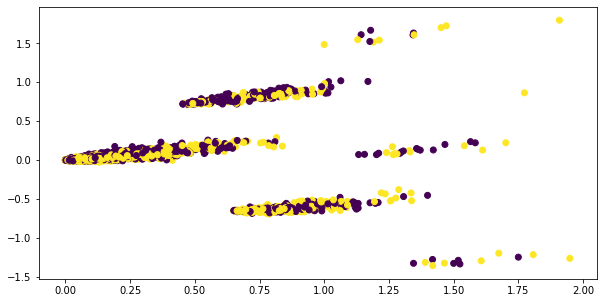

In [11]:
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

La representación vectorial logra generar un agrupamiento consistente a lo largo del dataset. Pero según el coloreo claramente las clases positiva y negativa están mezcladas y no se pueden diferenciar con una curva evidente, ya que probablemente cada palabra aún no tiene una representación semántica ni significado para la máquina.

f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma 𝑙2). Varíe el parámetro de regularización 𝐶, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro 𝐶. Explique el significado y valor esperado del parámetro de regularización.

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(C=10**param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs =[-4,-3,-2,-1,0,1,2,3] #se cambió para que fuera más fácil de visualizar en el gráfico.
train_cs_acc = [0,0,0,0,0,0,0,0]
test_cs_acc = [0,0,0,0,0,0,0,0]
for j in range(len(Cs)):
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, Cs[j])
    train_cs_acc[j] = train_acc
    test_cs_acc[j] = test_acc

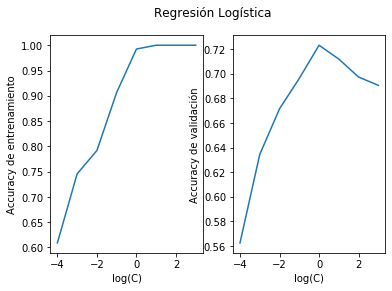

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Regresión Logística')
ax1.set(xlabel ='log(C)', ylabel='Accuracy de entrenamiento')
ax2.set(xlabel ='log(C)', ylabel='Accuracy de validación')
ax1.plot(Cs,train_cs_acc)
ax2.plot(Cs,test_cs_acc)

In [14]:
max = 0
for j in range(len(Cs)):
        if test_cs_acc[j] > max:
            max = test_cs_acc[j]
            pos_j = j
print('Reg Logistica: max_acc ={} , Cs = {}'.format(max,Cs[pos_j]))

Reg Logistica: max_acc =0.7232845894263217 , Cs = 0


El parámetro de regularización C determina el grado de shrinkage que sufren los coeficientes betha de la solución no regularizada, y por tanto a un mayor C corresponde siempre un mayor (o igual) error de entrenamiento. Es por ello que se ve un score decreciente luego del óptimo en el gráfico del dataset de evaluación, ya que el error aumenta y por tanto la precisión disminuye.

g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización 𝐶 para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

In [15]:
from sklearn import svm #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel):
    #print("Param C= ",C, 'Kernel= ', kernel)
    model= svm.SVC(kernel=kernel,C=10**param)
    #model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [-4,-3,-2,-1,0,1,2,3]
train_linear = [0,0,0,0,0,0,0,0]
test_linear = [0,0,0,0,0,0,0,0]
train_rbf = [0,0,0,0,0,0,0,0]
test_rbf = [0,0,0,0,0,0,0,0]
train_sig = [0,0,0,0,0,0,0,0]
test_sig = [0,0,0,0,0,0,0,0]
train_poly = [0,0,0,0,0,0,0,0]
test_poly = [0,0,0,0,0,0,0,0]
for j in range(len(Cs)):
    model, train_linear[j], test_linear[j] = do_SVM(features_train,labels_train,features_val,labels_val, Cs[j],'linear')
    model, train_rbf[j], test_rbf[j] = do_SVM(features_train,labels_train,features_val,labels_val, Cs[j],'rbf')
    model, train_sig[j], test_sig[j] = do_SVM(features_train,labels_train,features_val,labels_val, Cs[j],'sigmoid')

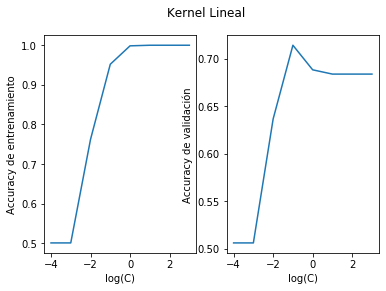

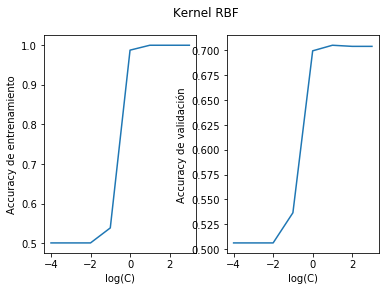

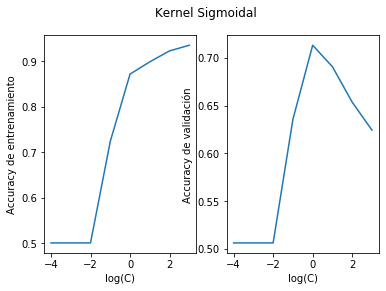

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Kernel Lineal')
ax1.set(xlabel ='log(C)', ylabel='Accuracy de entrenamiento')
ax2.set(xlabel ='log(C)', ylabel='Accuracy de validación')
ax1.plot(Cs,train_linear)
ax2.plot(Cs,test_linear)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Kernel RBF')
ax1.set(xlabel ='log(C)', ylabel='Accuracy de entrenamiento')
ax2.set(xlabel ='log(C)', ylabel='Accuracy de validación')
ax1.plot(Cs,train_rbf)
ax2.plot(Cs,test_rbf)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Kernel Sigmoidal')
ax1.set(xlabel ='log(C)', ylabel='Accuracy de entrenamiento')
ax2.set(xlabel ='log(C)', ylabel='Accuracy de validación')
ax1.plot(Cs,train_sig)
ax2.plot(Cs,test_sig)

In [17]:
max = 0
for j in range(len(Cs)):
        if test_linear[j] > max:
            max = test_linear[j]
            pos_j = j
print('Linear: max_acc ={} , Cs = {}'.format(max,Cs[pos_j]))
max = 0
for j in range(len(Cs)):
        if test_rbf[j] > max:
            max = test_rbf[j]
            pos_j = j
print('RBF: max_acc ={} , Cs = {}'.format(max,Cs[pos_j]))
max = 0
for j in range(len(Cs)):
        if test_sig[j] > max:
            max = test_sig[j]
            pos_j = j
print('Sigmoidal: max_acc ={} , Cs = {}'.format(max,Cs[pos_j]))

Linear: max_acc =0.7142857142857143 , Cs = -1
RBF: max_acc =0.7052868391451068 , Cs = 1
Sigmoidal: max_acc =0.7131608548931384 , Cs = 0


En una SVM de clasificación se busca una curva que logre clasificar cada punto (input en el entrenamiento), pero habrá siempre algunos puntos "indecisos" que están muy cerca de esa frontera de clasificación. Para ello es necesaria una holgura en esa frontera donde los puntos indecisos son ignorados durante el entrenamiento. 

El parámetro de regularización C balancea entre la cantidad de puntos ignorados y el margen de holgura obtenido en la SVM. Un valor pequeño de C permite ignorar un gran conjuntos de puntos de entrenamiento enfocando el aprendizaje en la maximización del margen. En cambio un valor grande de C no permite que se ignoren muchos puntos, enfocando el aprendizaje en la minimización del error de entrenamiento.

Considerando el error en los conjuntos de validación se espera un parámetro C de -1, 0 y 1 respectivamente para Lineal, RBF y Sigmoidal.

h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos 𝑘 en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

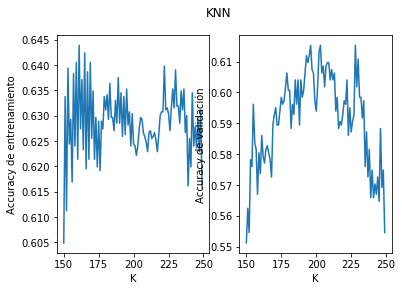

In [18]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(150, 250, 1)
train_knn = np.zeros(len(Ks))
test_knn = np.zeros(len(Ks))
for j in range(len(Ks)):
    model, train_knn[j], test_knn[j] = do_KNN(features_train,labels_train,features_val,labels_val, Ks[j])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('KNN')
ax1.set(xlabel ='K', ylabel='Accuracy de entrenamiento')
ax2.set(xlabel ='K', ylabel='Accuracy de validación')
ax1.plot(Ks,train_knn)
ax2.plot(Ks,test_knn)

In [19]:
max = 0
pos = 0
for i in range(len(test_knn)):
    if test_knn[i]>max:
        pos = i
        max = test_knn[i]
print('max_acc ={} , Ks = {}'.format(max,Ks[pos]))

max_acc =0.6152980877390326 , Ks = 196


Para cada punto se revisa la clasificación de los K más cercanos, y su clasificación correspondera a la clasificación más popular de entre sus vecinos.
Del conjunto de validación se puede observar que para K=196 está la mayor precisión, cercana al 61.5%.

i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de max depth y min samples split de manera separada, constuyendo gráficos de error respecto a estos parámetros. Los valores que se presentan son sugerencias, no es necesario utilizar los mismos. Comente sobre la diferencia entre la selección de estos dos parámetros.

In [20]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, 61, 2 ) #choose steps
Samples = np.arange(3, 304 , 3 ) #choose steps
train_tree =np.zeros((30,101))
test_tree =np.zeros((30,101))
for i in range(len(Depths)):
    for j in range(len(Samples)):
        model, train_tree[i][j], test_tree[i][j] = do_Tree(features_train,labels_train,features_val,labels_val,Depths[i],Samples[j])

In [21]:
max = 0
for i in range(len(Depths)):
    for j in range(len(Samples)):
        if test_tree[i][j] > max:
            max = test_tree[i][j]
            pos_i = i
            pos_j = j
print('max_acc ={} , Depths = {}, Samples = {}'.format(max,Depths[pos_i]+1,Samples[pos_j]+3))

max_acc =0.6017997750281214 , Depths = 58, Samples = 48


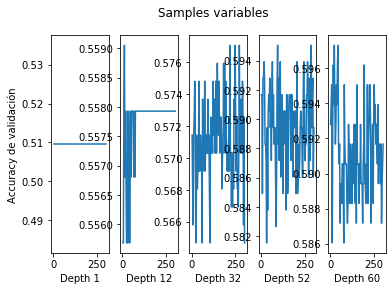

In [22]:
fig, (ax0,ax1, ax2, ax3, ax4) = plt.subplots(1,5)
fig.suptitle('Samples variables')
ax0.set(xlabel ='Depth 1', ylabel='Accuracy de validación')
ax1.set(xlabel ='Depth 12')
ax2.set(xlabel ='Depth 32')
ax3.set(xlabel ='Depth 52')
ax4.set(xlabel ='Depth 60')
ax0.plot(Samples,test_tree[0])
ax1.plot(Samples,test_tree[5])
ax2.plot(Samples,test_tree[15])
ax3.plot(Samples,test_tree[25])
ax4.plot(Samples,test_tree[29])

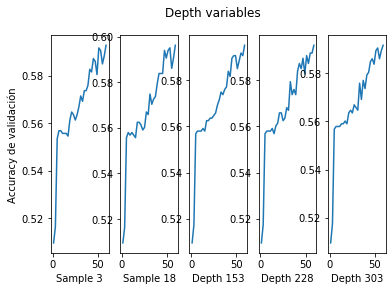

In [23]:
fig, (ax0,ax1, ax2, ax3, ax4) = plt.subplots(1,5)
fig.suptitle('Depth variables')
ax0.set(xlabel ='Sample 3', ylabel='Accuracy de validación')
ax1.set(xlabel ='Sample 18')
ax2.set(xlabel ='Depth 153')
ax3.set(xlabel ='Depth 228')
ax4.set(xlabel ='Depth 303')
ax0.plot(Depths,test_tree[:,0])
ax1.plot(Depths,test_tree[:,5])
ax2.plot(Depths,test_tree[:,50])
ax3.plot(Depths,test_tree[:,75])
ax4.plot(Depths,test_tree[:,100])

Se puede apreciar que a medida que se aumenta la profundidad, el accuracy aumenta. Caso diferente es que los Samples parecieran ser más aleatorios, pero ciertamente se estabiliza su accuracy máximo a medida que aumentan los depths.
Para este ejemplo en concreto, la profundidad del árbol tiene una mayor relevancia para el cálculo del accuracy, aunque la cantidad de muestras en la que se divide para cada categoría ayuda a encontrar más rápido el óptimo.

j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de keras): entrenada por 25 iteraciones al dataset (epochs) con un tamaño de batch de 128 para las actualizaciones de los pesos, utilizando SGD con una tasa de aprendizaje 0.1 sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas 𝑁ℎ y la capa de entrada implícita para 𝑥. Varíe el parámetro que corresponde al número de neuronas en la capa oculta 𝑁ℎ, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]

Using TensorFlow backend.


In [25]:
train_ANN = np.zeros(9)
test_ANN = np.zeros(9)
for j in range(len(N_h)):
    model, train_ANN[j], test_ANN[j] = do_ANN(features_train,labels_train,features_val,labels_val, N_h[j])

Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


In [26]:
max = 0
for j in range(len(N_h)):
        if test_ANN[j] > max:
            max = test_ANN[j]
            pos_j = j
print('max_acc ={} , N_n = {}'.format(max,N_h[pos_j]))

max_acc =0.6332958340644836 , N_n = 4


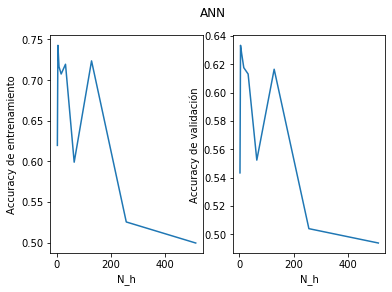

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('ANN')
ax1.set(xlabel ='N_h', ylabel='Accuracy de entrenamiento')
ax2.set(xlabel ='N_h', ylabel='Accuracy de validación')
ax1.plot(N_h,train_ANN)
ax2.plot(N_h,test_ANN)

La mejor precisión, se alcanza cuando hay una capa escondida de 4 neuronas. Luego a medida que aumenta la cantidad de neuronas, la precisión decae sustancialmente. Al tener una sola capa oculta de profundidad, agregar más neuronas aumenta la dimensionalidad para el cálculo en la capa de salidad.

k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

La mejor regresión en las pruebas anteriores fue la logística con Cs = 0 y una precisión del 72% aproximada.

In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(C=10**param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)
print('acc_train = {} , acc_test = {}'.format(train_acc,test_acc))

acc_train = 0.9924953095684803 , acc_test = 0.7090602138435566


La precisión en el conjunto de prueba es muy similar a la vista en el conjunto de validación, por lo que la calidad del trabajo se mantuvo. 
El texto posee ambigüedad debido al pre-procesamiento, en el sentido de que por ejemplo "i like it" y "i do not like it" son pre-procesados como "like" entonces la máquina tendrá que jugársela al 50% para clasificar textos de ese tipo. Es por eso que si se considera que 7 de cada 10 inputs son clasificados correctamente, entonces se puede decir que es un buen valor.
A la vez, debido a la ambigüedad descrita anteriormente, un buen valor de referencia sería 60% como los vistos en otros modelos testeados como K-nn, redes neuronales artificiales y árboles de decisión cuyas precisiones fueron del 65% aprox.

l) Para comparar sus resultados utilice el modelo VADER (Valence Aware Dictionary and sEntiment Reasoner) [6], el cual entrega una score de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

La precisión del modelo VADER fue de un 64% aprox, muy similar a los resultados obtenidos con K-nn, redes neuronales artificiales y árboles de decisión. A la vez regresión logísitica y las SVM (lineal, sigmoidal y rbf) fueron superiores.
Esto sugiere que el supuesto de ambigüedad descrito anteriormente se valida, y que por ende las modelos trabajados hasta ahora responder de la forma más eficiente posible (conforme a las herramientas que poseemos hasta ahora en el curso).

m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación TF genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

El modelo a utilizar es el KNN, aunque también es posible utilizar un modelo no probabilistico utilizando un calibrador como "CalibratedClassifierCV(model)".

In [30]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 196)

In [31]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

In [32]:
max = 0
max1= 0
max2= 0
max3= 0
max4= 0
max5= 0
min = 100000
min1 = 100000
min2 = 100000
min3 = 100000
min4 = 100000
min5 = 100000
for i in range(V):
    a = word_scores[i][1] #segunda columna, correspondiente a la clase 1 o positiva
    if a>max:
        max = word_scores[i][1]
        max5=max4
        max4=max3
        max3=max2
        max2=max1
        max1 = i
    if a<min:
        min = word_scores[i][1]
        min5=min4
        min4=min3
        min3=min2
        min2=min1
        min1 = i

In [33]:
print('La palabra postiva con mejor puntaje fue "{}".'.format(vocab[max1]))
print('La palabra postiva con 2do mejor puntaje fue "{}".'.format(vocab[max2]))
print('La palabra postiva con 3er mejor puntaje fue "{}".'.format(vocab[max3]))
print('La palabra postiva con 4to mejor puntaje fue "{}".'.format(vocab[max4]))
print('La palabra postiva con 5to mejor puntaje fue "{}".'.format(vocab[max5]))
print('\n')
print('La palabra negativa con peor puntaje fue "{}".'.format(vocab[min1]))
print('La palabra negativa con 2do peor puntaje fue "{}".'.format(vocab[min2]))
print('La palabra negativa con 3er peor puntaje fue "{}".'.format(vocab[min3]))
print('La palabra negativa con 4to peor puntaje fue "{}".'.format(vocab[min4]))
print('La palabra negativa con 5to peor puntaje fue "{}".'.format(vocab[min5]))

La palabra postiva con mejor puntaje fue "world".
La palabra postiva con 2do mejor puntaje fue "moving".
La palabra postiva con 3er mejor puntaje fue "heart".
La palabra postiva con 4to mejor puntaje fue "beautiful".
La palabra postiva con 5to mejor puntaje fue "always".


La palabra negativa con peor puntaje fue "cliche".
La palabra negativa con 2do peor puntaje fue "boring".
La palabra negativa con 3er peor puntaje fue "bad".
La palabra negativa con 4to peor puntaje fue "apparent".
La palabra negativa con 5to peor puntaje fue "already".


En el caso de las palabras positivas es más notorio que lo son, ya que moving (de conmover), heart y beautiful tienen un significado positivo. En cambio, de las negativas, sólo bad tiene un enfoque puramente negativo y las otras palabras probablemente dependen del contexto de la frase, por ejemplo "actor" seguramente venía acomapañda de una critica destructiva a tal actor.

n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de stemmming [7] en lugar de lemmatization para llevar a su tronco léxico.

In [34]:
import re, time
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
def base_word(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    text = re.sub(r'[0-9]+', '', text) #se eliminan los números
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

In [35]:
texts_train2 = [word_extractor(text) for text in df_train_text]
texts_val2 = [word_extractor(text) for text in df_val_text]
texts_test2 = [word_extractor(text) for text in df_test_text]

In [36]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train2)
features_train = vectorizer.transform(texts_train2)
features_val = vectorizer.transform(texts_val2)
features_test = vectorizer.transform(texts_test2)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

In [37]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 196)

In [38]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

In [39]:
max = 0
max1= 0
max2= 0
max3= 0
max4= 0
max5= 0
min = 100000
min1 = 100000
min2 = 100000
min3 = 100000
min4 = 100000
min5 = 100000
for i in range(V):
    a = word_scores[i][1] #segunda columna, correspondiente a la clase 1 o positiva
    if a>max:
        max = word_scores[i][1]
        max5=max4
        max4=max3
        max3=max2
        max2=max1
        max1 = i
    if a<min:
        min = word_scores[i][1]
        min5=min4
        min4=min3
        min3=min2
        min2=min1
        min1 = i

Utilizando la técnica de Stemming y a la vez eliminando los números se obtienen las siguientes palabras:

In [40]:
print('La palabra postiva con mejor puntaje fue "{}".'.format(vocab[max1]))
print('La palabra postiva con 2do mejor puntaje fue "{}".'.format(vocab[max2]))
print('La palabra postiva con 3er mejor puntaje fue "{}".'.format(vocab[max3]))
print('La palabra postiva con 4to mejor puntaje fue "{}".'.format(vocab[max4]))
print('La palabra postiva con 5to mejor puntaje fue "{}".'.format(vocab[max5]))
print('\n')
print('La palabra negativa con peor puntaje fue "{}".'.format(vocab[min1]))
print('La palabra negativa con 2do peor puntaje fue "{}".'.format(vocab[min2]))
print('La palabra negativa con 3er peor puntaje fue "{}".'.format(vocab[min3]))
print('La palabra negativa con 4to peor puntaje fue "{}".'.format(vocab[min4]))
print('La palabra negativa con 5to peor puntaje fue "{}".'.format(vocab[min5]))

La palabra postiva con mejor puntaje fue "world".
La palabra postiva con 2do mejor puntaje fue "open".
La palabra postiva con 3er mejor puntaje fue "histori".
La palabra postiva con 4to mejor puntaje fue "heart".
La palabra postiva con 5to mejor puntaje fue "complex".


La palabra negativa con peor puntaje fue "silli".
La palabra negativa con 2do peor puntaje fue "bore".
La palabra negativa con 3er peor puntaje fue "bad".
La palabra negativa con 4to peor puntaje fue "appar".
La palabra negativa con 5to peor puntaje fue "alreadi".


El resultado es un poco más confuso ya que se eliminan algunas letras como la "s", la "e" o "ent".

o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las 𝐾 palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar n-gramas, entre otras.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train2)
features_train = tfidf_model.transform(texts_train2)
features_val = tfidf_model.transform(texts_val2)
features_test = tfidf_model.transform(texts_test2)
vocab = tfidf_model.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(C=10**param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)
print('acc_train = {} , acc_test = {}'.format(train_acc,test_acc))

acc_train = 0.9358348968105066 , acc_test = 0.7318514350028137


La precisión del modelo mejoró un 1% con los cambios efectuados anteriormente.

p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [42]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.74      0.74      0.74      1803
           +       0.73      0.73      0.73      1751

    accuracy                           0.73      3554
   macro avg       0.73      0.73      0.73      3554
weighted avg       0.73      0.73      0.73      3554



Debido a la similitud entre los datos no hay nada que se pueda inferir.

q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En sklearn ésto puede ser realizado con el parámetro de class_weights. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [43]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
classes_weights = {0: 5, 1: 1}
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(class_weight=classes_weights,C=10**param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)
print('acc_train = {} , acc_test = {}'.format(train_acc,test_acc))

acc_train = 0.6375234521575985 , acc_test = 0.5756893640967924


El accuracy en el set de prueba disminuyo en 15%.

In [44]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.55      0.99      0.70      1803
           +       0.94      0.15      0.26      1751

    accuracy                           0.58      3554
   macro avg       0.74      0.57      0.48      3554
weighted avg       0.74      0.58      0.48      3554



De acuerdo a "precision", las palabras negativas bajaron su precisión al 55% pero su recall aumento al 99%. Caso contrario las palabrasa positivas aumentaron su precision al 94% pero su recall disminuyó al 15%. En el caso general recall y f1-score disminuyeron casi 15% y 25% respectivamente en comparación al caso anterior.

El recall al tener un valor casi del 100% en los negativos indica que es casi imposible que el modelo tenga falsos positivos con respecto a los negativos. En ese sentido asignarle los pesos fue provechoso, pero respecto a los positivos casi siempre arroja falsos positivos.

r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [45]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.84907607 0.15092393]
Raw text:  a generic family comedy unlikely to be appreciated by anyone outside the under-10 set .

True sent:  0.0 -- Pred sent:  [0.78500217 0.21499783]
Raw text:  one of those staggeringly well-produced , joylessly extravagant pictures that keep whooshing you from one visual marvel to the next , hastily , emptily .

True sent:  0.0 -- Pred sent:  [0.72588401 0.27411599]
Raw text:  'yes , that's right : it's forrest gump , angel of death . '

True sent:  0.0 -- Pred sent:  [0.90225852 0.09774148]
Raw text:  a surprisingly flat retread , hobbled by half-baked setups and sluggish pacing .

True sent:  0.0 -- Pred sent:  [0.83551645 0.16448355]
Raw text:  jacobi , the most fluent of actors , is given relatively dry material from nijinsky's writings to perform , and the visuals , even erotically frank ones , become dullingly repetitive .

True sent:  0.0 -- Pred sent:  [0.7279771 0.2720229]
Raw text:  . . . hopefully it'll be at the 

Los negativos los escoge correctamente, pero en los positivos siempre falla. Eso es porque está usando el modelo con pesos utilizado anteriormente.
Si utilizamos un modelo sin pesos, o con pesos equilibrados entonces:

In [46]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
classes_weights = {0: 1, 1: 1}
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(class_weight=classes_weights,C=10**param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)
print('acc_train = {} , acc_test = {}'.format(train_acc,test_acc))

acc_train = 0.9358348968105066 , acc_test = 0.7318514350028137


In [47]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  1.0 -- Pred sent:  [0.37005415 0.62994585]
Raw text:  a rigorously structured and exquisitely filmed drama about a father and son connection that is a brief shooting star of love .

True sent:  1.0 -- Pred sent:  [0.71124118 0.28875882]
Raw text:  like these russo guys lookin' for their mamet instead found their sturges .

True sent:  1.0 -- Pred sent:  [0.30727031 0.69272969]
Raw text:  this engrossing , characteristically complex tom clancy thriller is shifty in the manner in which it addresses current terrorism anxieties and sidesteps them at the same time .

True sent:  1.0 -- Pred sent:  [0.31908105 0.68091895]
Raw text:  the artwork is spectacular and unlike most animaton from japan , the characters move with grace and panache .

True sent:  0.0 -- Pred sent:  [0.44509205 0.55490795]
Raw text:  in the second half of the film , frei's control loosens in direct proportion to the amount of screen time he gives nachtwey for self-analysis .

True sent:  0.0 -- Pred sent:  

En general, entre 3 y 5 textos de los 15 los clasifica mal. Lo que se corresponde al 73% de accuracy observado.

La predicción continua entrega más información, ya que a través de las probabilidades se puede dar cuenta de cuánto margen de acertar existe. También a través de esta se puede determinar dar "pesos" a las clases para hacer otro tipo de consultas al modelo.

s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

Tanto regresión logística como las SVM resultaron ser superior en accuracy y en tiempo, en especial regresión logística el cual fue el mejor modelo.

Si bien, la elección del modelo fue importante, la elección correcta de los parámetros lo era aún más, ya que dependiendo de los parámetros el accuracy era apenas superior al 50% y en el óptimo, incluso en los peores modelos, estuvieron apenas un 6% por debajo del mejor modelo.

La representación de los datos tuvo un gran impacto en los datos al eliminar palabras innecesarias. Pero una vez ya eliminadas las stopwords y números, independiente de la ténica de pre-procesamiento, el porcentaje de accuracy no variaba mucho.

El mejor modelo, en accuracy fue la regresión logísitica, pero teniendo en cuenta la búsqueda del parámetro óptimo, el mejor modelo en tiempo y accuracy fue SVM (kernel linear) ya que el rango de su parámetro permitió una búsqueda rápida del óptimo. 